## Measure density of Ribeye ##  
From single-channel movies  
10/20 Gayatri

In [132]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from matplotlib.offsetbox import AnchoredText

# Change directory
os.chdir("/home/gayatri/storm/cochlea/exp-6-p15-9-Oct/20-10-12-set1-ribA-single")

In [143]:
# Select a molecule list
df = pd.read_csv('2_3_2ch_movie_0003_daostorm.csv')

# Load the list of synapses
slist = pd.read_csv('exp-6-2-synapses.csv')

In [134]:
# Select a synapse
movie = 2
num = 3
s = slist[(slist['movie']==movie) & (slist['synapse']==num)]
syn = df[(df['category']==1) & (df['x'].between(s.iloc[0,4], s.iloc[0,6])) & (df['y'].between(s.iloc[0,5], s.iloc[0,7]))]

In [135]:
syn.describe()

,index,frame,background,category,error,height,iterations,significance,sum,x,xsigma,y,ysigma,z
count,672.000000,672.000000,672.000000,672.0,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,61417.967262,15492.163690,45.301426,1.0,264.124900,130.716879,14.315476,39.795065,1127.708818,78.602967,1.300693,88.654888,1.069116,0.005899
std,32418.928473,8559.318231,4.583620,0.0,59.140565,54.463456,12.015211,15.493781,483.870538,0.592111,0.141702,0.559180,0.165533,0.219937
min,36.000000,12.000000,35.048000,1.0,149.484000,50.848000,5.000000,20.199000,420.859000,77.331000,0.800000,87.128000,0.800000,-0.401000
25%,33199.500000,7539.500000,41.787500,1.0,226.079250,91.139500,10.000000,28.372750,777.957250,78.243500,1.206750,88.215750,0.962750,-0.016000
50%,64779.500000,17212.000000,44.989500,1.0,254.065500,115.231500,11.000000,35.286000,979.521500,78.528000,1.298500,88.649000,1.032500,0.092000
75%,87978.500000,22234.500000,48.418750,1.0,287.367750,155.852750,13.000000,46.984750,1352.874750,78.881750,1.419250,88.997000,1.128000,0.156000
max,116318.000000,29982.000000,61.397000,1.0,756.303000,399.917000,128.000000,105.838000,3350.882000,81.811000,1.500000,90.952000,1.500000,0.237000


Peak density =  428.0  molecules per pixel


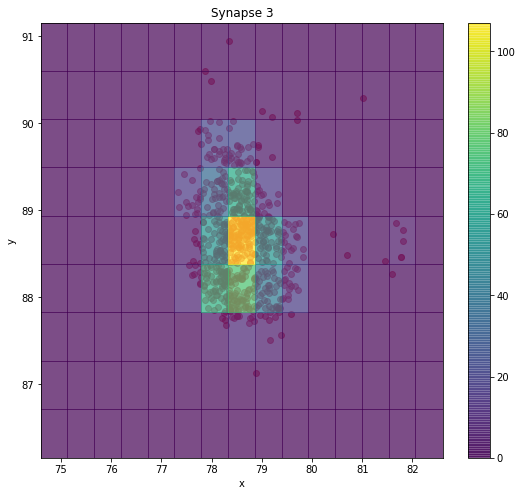

In [136]:
# Display the synapse to adjust coordinates if required

# from mpl_toolkits import mplot3d

# Define 2D bins
x_mean = syn['x'].mean()
y_mean = syn['y'].mean()
x_start = x_mean - (s.iloc[0,6]-s.iloc[0,4])/2
x_end = x_mean + (s.iloc[0,6]-s.iloc[0,4])/2
x_gap = ((s.iloc[0,6]-s.iloc[0,4])*2) + 1
y_start = y_mean - (s.iloc[0,7]-s.iloc[0,5])/2
y_end = y_mean + (s.iloc[0,7]-s.iloc[0,5])/2
y_gap = ((s.iloc[0,7]-s.iloc[0,5])*2) + 1
x_bins = numpy.linspace(x_start-0.5, x_end+0.5, x_gap+1) 
y_bins = numpy.linspace(y_start-0.5, y_end+0.5, y_gap+1) 

# Display 2D histogram
fig = plt.figure(figsize = (9,8))
ax = plt.axes()
ax.scatter(syn['x'], syn['y'], alpha=0.5, color = "crimson")
h = plt.hist2d(syn['x'], syn['y'], bins=[x_bins, y_bins], alpha=0.7)
# plt.xlim([syn['x'].max(), syn['x'].min()])
# plt.ylim([syn['y'].max(), syn['y'].min()])
plt.ylabel('y')
plt.xlabel('x')
plt.colorbar()
plt.title('Synapse '+str(num))
print('Peak density = ', numpy.max(h[0])*4, ' molecules per pixel')
slist['d'][(slist['movie']==movie) & (slist['synapse']==num)]= numpy.max(h[0])*4
slist['total'][(slist['movie']==movie) & (slist['synapse']==num)] = syn.shape[0]
plt.show()

In [137]:
# slist.to_csv('exp-6-2-synapses.csv', index=False)

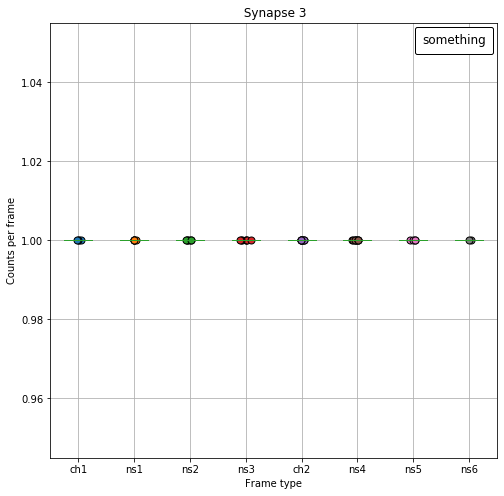

In [165]:
# Plotting no. of localizations per frame (type) 

# For sequence 0211103111 (activation is ON in 2 and 3)
cycle_size = 10
last_frame = cycle_size*600
f = 51
ch1 = numpy.arange(f,last_frame,cycle_size)
ns1 = numpy.arange(f+1,last_frame,cycle_size)
ns2 = numpy.arange(f+2,last_frame,cycle_size)
ns3 = numpy.arange(f+3,last_frame,cycle_size)
ch2 = numpy.arange(f+5,last_frame,cycle_size)
ns4 = numpy.arange(f+6,last_frame,cycle_size)
ns5 = numpy.arange(f+7,last_frame,cycle_size)
ns6 = numpy.arange(f+8,last_frame,cycle_size)

# Synapse redefined 

synapse = df[(df['x'].between(s.iloc[0,4], s.iloc[0,6])) & (df['y'].between(s.iloc[0,5], s.iloc[0,7]))]
# synapse = df[df['category']==0]
counts = synapse['frame'].value_counts().sort_index()

s1 = pd.Series(numpy.ravel(counts.reindex(ch1).values), index=None, name='ch1')
s2 = pd.Series(numpy.ravel(counts.reindex(ns1).values), index=None, name='ns1')
s3 = pd.Series(numpy.ravel(counts.reindex(ns2).values), index=None, name='ns2')
s4 = pd.Series(numpy.ravel(counts.reindex(ns3).values), index=None, name='ns3')
s5 = pd.Series(numpy.ravel(counts.reindex(ch2).values), index=None, name='ch2')
s6 = pd.Series(numpy.ravel(counts.reindex(ns4).values), index=None, name='ns4')
s7 = pd.Series(numpy.ravel(counts.reindex(ns5).values), index=None, name='ns5')
s8 = pd.Series(numpy.ravel(counts.reindex(ns6).values), index=None, name='ns6')

counts_per_frame = pd.concat([s1, s2, s3, s4, s5, s6, s7, s8], axis=1)

fig, ax = plt.subplots(figsize = (8,8))

counts_per_frame.boxplot()
# mfc = ["darkorange","yellowgreen","steelblue"][i],
for i,d in enumerate(counts_per_frame):
    y = counts_per_frame[d]
    x = numpy.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mec='k', ms=7, marker="o", linestyle="None")

at = AnchoredText('something', loc='upper right', prop=dict(size=12), frameon=True)
at.patch.set_boxstyle("round,pad=0.2,rounding_size=0.2")
ax.add_artist(at)

# plt.ylim([0, 5])
plt.ylabel('Counts per frame')
plt.xlabel('Frame type')
plt.title(' Synapse '+str(num))
# plt.savefig(movie_name + '_boxplot')
plt.show()

In [155]:
counts_per_frame

,ch1,ns1,ns2,ns3,ch2,ns4,ns5,ns6
0,11.0,11,8,9,6,3,3.0,6.0
1,3.0,4,5,4,4,2,4.0,4.0
2,8.0,7,8,6,3,4,2.0,3.0
3,4.0,6,7,7,5,6,5.0,5.0
4,7.0,7,4,5,3,3,2.0,5.0
...,...,...,...,...,...,...,...,...
695,7.0,6,11,7,6,5,5.0,6.0
696,7.0,6,7,7,3,3,2.0,3.0
697,6.0,9,9,5,3,4,3.0,1.0
698,5.0,8,6,5,4,3,3.0,1.0
